In [69]:
import numpy as np
import pandas as pd
import re

In [70]:
f=open("WhatsApp Chat with B42 100 DAYS 🤩.txt",'r',encoding='utf-8')

In [71]:
data=f.read()

In [72]:
print(type(data))

<class 'str'>


In [73]:
data

'3/29/24, 11:27\u202fAM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n3/29/24, 10:27\u202fAM - Lamia Mujeeb Adn Talk created group "B42 100 DAYS 🤩"\n3/29/24, 11:27\u202fAM - You joined using this group\'s invite link\n3/29/24, 11:28\u202fAM - +91 6282 911 790 joined using this group\'s invite link\n3/29/24, 11:34\u202fAM - Al Fidha Adn Talks Fathima joined using this group\'s invite link\n3/29/24, 11:35\u202fAM - +91 96330 42864 joined using this group\'s invite link\n3/29/24, 12:15\u202fPM - +91 95264 81240 joined using this group\'s invite link\n3/29/24, 12:23\u202fPM - +91 94001 16446 joined using this group\'s invite link\n3/29/24, 12:50\u202fPM - Hisana GC joined using this group\'s invite link\n3/29/24, 1:26\u202fPM - Fathima Kp Gc-areekaad joined using this group\'s invite link\n3/29/24, 2:03\u202fPM - +91 90722 66940 joined using this group\'s invite link\n3/29/24, 2:14\u202fPM - +9

In [74]:
# data = data.split('\n')
# data

In [75]:
import re

# pattern = r'^(\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}\s?[AP]M) - (.+)$'
# # Add the DOTALL flag to match across multiple lines
# pattern = re.compile(pattern, re.DOTALL)
pattern = r'^(\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}\s?[AP]M) - (.+?)(?=\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}\s?[AP]M|\Z)'
pattern = re.compile(pattern, re.DOTALL | re.MULTILINE)
timestamps = []
messages = []

# Iterate over each match in the data using finditer
for match in pattern.finditer(data):
    timestamp = match.group(1)
    message = match.group(2).strip()  # Remove leading/trailing whitespace
    timestamps.append(timestamp)
    messages.append(message)

# Create DataFrame from the lists
df = pd.DataFrame({'Date': timestamps, 'user_message': messages})
df


,Date,user_message
0,"3/29/24, 11:27 AM",Messages and calls are end-to-end encrypted. N...
1,"3/29/24, 10:27 AM","Lamia Mujeeb Adn Talk created group ""B42 100 D..."
2,"3/29/24, 11:27 AM",You joined using this group's invite link
3,"3/29/24, 11:28 AM",+91 6282 911 790 joined using this group's inv...
4,"3/29/24, 11:34 AM",Al Fidha Adn Talks Fathima joined using this g...
...,...,...
1067,"4/22/24, 10:29 AM",+91 95390 78632: Day 23\nAslam azlu\n\n🏅forgiv...
1068,"4/22/24, 10:37 AM",+91 97456 65032: Day 17\nFidha Nasrin \n\n🏅for...
1069,"4/22/24, 10:48 AM",+91 94955 07355: DAY 023\nSabnam❤️\n\n\n\n🏅 Fo...
1070,"4/22/24, 11:06 AM",+91 99477 97575: Day 23\nSaifudheen knr\n\n🏅fo...


In [76]:
df

,Date,user_message
0,"3/29/24, 11:27 AM",Messages and calls are end-to-end encrypted. N...
1,"3/29/24, 10:27 AM","Lamia Mujeeb Adn Talk created group ""B42 100 D..."
2,"3/29/24, 11:27 AM",You joined using this group's invite link
3,"3/29/24, 11:28 AM",+91 6282 911 790 joined using this group's inv...
4,"3/29/24, 11:34 AM",Al Fidha Adn Talks Fathima joined using this g...
...,...,...
1067,"4/22/24, 10:29 AM",+91 95390 78632: Day 23\nAslam azlu\n\n🏅forgiv...
1068,"4/22/24, 10:37 AM",+91 97456 65032: Day 17\nFidha Nasrin \n\n🏅for...
1069,"4/22/24, 10:48 AM",+91 94955 07355: DAY 023\nSabnam❤️\n\n\n\n🏅 Fo...
1070,"4/22/24, 11:06 AM",+91 99477 97575: Day 23\nSaifudheen knr\n\n🏅fo...


In [77]:
df.shape

(1072, 2)

In [78]:
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)
df.head()
        

,Date,user,message
0,"3/29/24, 11:27 AM",group_notification,Messages and calls are end-to-end encrypted. N...
1,"3/29/24, 10:27 AM",group_notification,"Lamia Mujeeb Adn Talk created group ""B42 100 D..."
2,"3/29/24, 11:27 AM",group_notification,You joined using this group's invite link
3,"3/29/24, 11:28 AM",group_notification,+91 6282 911 790 joined using this group's inv...
4,"3/29/24, 11:34 AM",group_notification,Al Fidha Adn Talks Fathima joined using this g...


In [79]:
# Convert 'Date' column to datetime format including AM/PM
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y, %I:%M %p')

# Extracting individual components of the datetime
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['AM/PM'] = df['Date'].dt.strftime('%p')

# Dropping the original 'Date' column
# df.drop(['Date'], axis=1, inplace=True)

In [80]:
df

,Date,user,message,Month,Day,Year,Hour,Minute,AM/PM
0,2024-03-29 11:27:00,group_notification,Messages and calls are end-to-end encrypted. N...,March,29,2024,11,27,AM
1,2024-03-29 10:27:00,group_notification,"Lamia Mujeeb Adn Talk created group ""B42 100 D...",March,29,2024,10,27,AM
2,2024-03-29 11:27:00,group_notification,You joined using this group's invite link,March,29,2024,11,27,AM
3,2024-03-29 11:28:00,group_notification,+91 6282 911 790 joined using this group's inv...,March,29,2024,11,28,AM
4,2024-03-29 11:34:00,group_notification,Al Fidha Adn Talks Fathima joined using this g...,March,29,2024,11,34,AM
...,...,...,...,...,...,...,...,...,...
1067,2024-04-22 10:29:00,+91 95390 78632,Day 23\nAslam azlu\n\n🏅forgiveness journal✅\n🏅...,April,22,2024,10,29,AM
1068,2024-04-22 10:37:00,+91 97456 65032,Day 17\nFidha Nasrin \n\n🏅forgiveness journal❌...,April,22,2024,10,37,AM
1069,2024-04-22 10:48:00,+91 94955 07355,DAY 023\nSabnam❤️\n\n\n\n🏅 Forgiveness Journal...,April,22,2024,10,48,AM
1070,2024-04-22 11:06:00,+91 99477 97575,Day 23\nSaifudheen knr\n\n🏅forgiveness journal...,April,22,2024,11,6,AM


In [81]:
    df

,Date,user,message,Month,Day,Year,Hour,Minute,AM/PM
0,2024-03-29 11:27:00,group_notification,Messages and calls are end-to-end encrypted. N...,March,29,2024,11,27,AM
1,2024-03-29 10:27:00,group_notification,"Lamia Mujeeb Adn Talk created group ""B42 100 D...",March,29,2024,10,27,AM
2,2024-03-29 11:27:00,group_notification,You joined using this group's invite link,March,29,2024,11,27,AM
3,2024-03-29 11:28:00,group_notification,+91 6282 911 790 joined using this group's inv...,March,29,2024,11,28,AM
4,2024-03-29 11:34:00,group_notification,Al Fidha Adn Talks Fathima joined using this g...,March,29,2024,11,34,AM
...,...,...,...,...,...,...,...,...,...
1067,2024-04-22 10:29:00,+91 95390 78632,Day 23\nAslam azlu\n\n🏅forgiveness journal✅\n🏅...,April,22,2024,10,29,AM
1068,2024-04-22 10:37:00,+91 97456 65032,Day 17\nFidha Nasrin \n\n🏅forgiveness journal❌...,April,22,2024,10,37,AM
1069,2024-04-22 10:48:00,+91 94955 07355,DAY 023\nSabnam❤️\n\n\n\n🏅 Forgiveness Journal...,April,22,2024,10,48,AM
1070,2024-04-22 11:06:00,+91 99477 97575,Day 23\nSaifudheen knr\n\n🏅forgiveness journal...,April,22,2024,11,6,AM


In [82]:
df[df['user']=='Ansiya'].shape[0]

24

In [83]:
num_media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]

In [84]:
num_media_messages

0

In [85]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [86]:
from urlextract import URLExtract

In [87]:
urls=URLExtract()
links=[]
for message in df['message']:
    links.extend(urls.find_urls(message))
links

['FATHIMA.KP',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp',
 'Fathima.kp']

In [88]:
df

,Date,user,message,Month,Day,Year,Hour,Minute,AM/PM
0,2024-03-29 11:27:00,group_notification,Messages and calls are end-to-end encrypted. N...,March,29,2024,11,27,AM
1,2024-03-29 10:27:00,group_notification,"Lamia Mujeeb Adn Talk created group ""B42 100 D...",March,29,2024,10,27,AM
2,2024-03-29 11:27:00,group_notification,You joined using this group's invite link,March,29,2024,11,27,AM
3,2024-03-29 11:28:00,group_notification,+91 6282 911 790 joined using this group's inv...,March,29,2024,11,28,AM
4,2024-03-29 11:34:00,group_notification,Al Fidha Adn Talks Fathima joined using this g...,March,29,2024,11,34,AM
...,...,...,...,...,...,...,...,...,...
1067,2024-04-22 10:29:00,+91 95390 78632,Day 23\nAslam azlu\n\n🏅forgiveness journal✅\n🏅...,April,22,2024,10,29,AM
1068,2024-04-22 10:37:00,+91 97456 65032,Day 17\nFidha Nasrin \n\n🏅forgiveness journal❌...,April,22,2024,10,37,AM
1069,2024-04-22 10:48:00,+91 94955 07355,DAY 023\nSabnam❤️\n\n\n\n🏅 Forgiveness Journal...,April,22,2024,10,48,AM
1070,2024-04-22 11:06:00,+91 99477 97575,Day 23\nSaifudheen knr\n\n🏅forgiveness journal...,April,22,2024,11,6,AM


In [89]:
x=df['user'].value_counts().head(16)

In [90]:
import matplotlib.pyplot as plt

In [91]:
name=x.index
count=x.values

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'group_notification'),
  Text(1, 0, '+91 94955 07355'),
  Text(2, 0, '+91 97463 32520'),
  Text(3, 0, 'Daniya GC'),
  Text(4, 0, '+91 94953 06588'),
  Text(5, 0, '+91 95390 78632'),
  Text(6, 0, '+91 94954 74668'),
  Text(7, 0, '+91 82816 56450'),
  Text(8, 0, '+91 80752 40476'),
  Text(9, 0, '+91 95264 81240'),
  Text(10, 0, '+91 89435 20640'),
  Text(11, 0, '+91 80788 04896'),
  Text(12, 0, 'Fathima Kp Gc-areekaad'),
  Text(13, 0, 'Ax Majida mm Adn Talks'),
  Text(14, 0, 'Hisana GC'),
  Text(15, 0, 'Ansiya')])

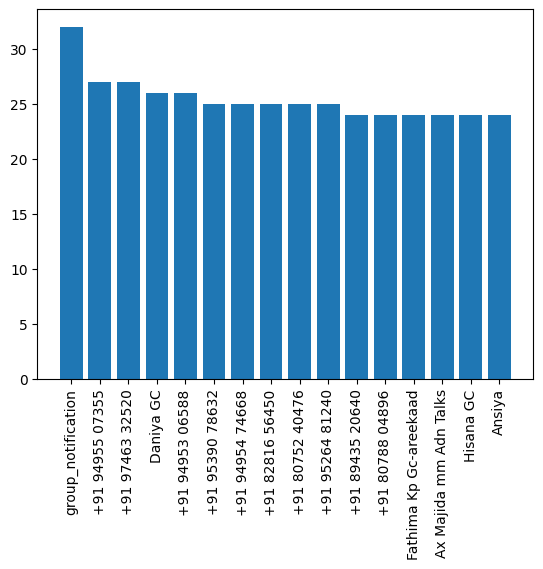

In [92]:
plt.bar(name,count)
plt.xticks(rotation='vertical')

In [93]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'name','count':'percent'})

,name,percent
0,group_notification,2.99
1,+91 94955 07355,2.52
2,+91 97463 32520,2.52
3,Daniya GC,2.43
4,+91 94953 06588,2.43
5,+91 95390 78632,2.33
6,+91 94954 74668,2.33
7,+91 82816 56450,2.33
8,+91 80752 40476,2.33
9,+91 95264 81240,2.33


In [94]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [95]:
temp=df[df['user']!='group notification']
temp=temp[temp['message']!='<Media omitted>']

In [96]:
temp

,Date,user,message,Month,Day,Year,Hour,Minute,AM/PM
0,2024-03-29 11:27:00,group_notification,Messages and calls are end-to-end encrypted. N...,March,29,2024,11,27,AM
1,2024-03-29 10:27:00,group_notification,"Lamia Mujeeb Adn Talk created group ""B42 100 D...",March,29,2024,10,27,AM
2,2024-03-29 11:27:00,group_notification,You joined using this group's invite link,March,29,2024,11,27,AM
3,2024-03-29 11:28:00,group_notification,+91 6282 911 790 joined using this group's inv...,March,29,2024,11,28,AM
4,2024-03-29 11:34:00,group_notification,Al Fidha Adn Talks Fathima joined using this g...,March,29,2024,11,34,AM
...,...,...,...,...,...,...,...,...,...
1067,2024-04-22 10:29:00,+91 95390 78632,Day 23\nAslam azlu\n\n🏅forgiveness journal✅\n🏅...,April,22,2024,10,29,AM
1068,2024-04-22 10:37:00,+91 97456 65032,Day 17\nFidha Nasrin \n\n🏅forgiveness journal❌...,April,22,2024,10,37,AM
1069,2024-04-22 10:48:00,+91 94955 07355,DAY 023\nSabnam❤️\n\n\n\n🏅 Forgiveness Journal...,April,22,2024,10,48,AM
1070,2024-04-22 11:06:00,+91 99477 97575,Day 23\nSaifudheen knr\n\n🏅forgiveness journal...,April,22,2024,11,6,AM


In [97]:
f= open('stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [98]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [99]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,🏅,5091
1,✅,2371
2,journal✅,1089
3,meditation✅,994
4,day,894
5,meditation,874
6,journal,823
7,love,729
8,forgiveness,728
9,night,728


In [100]:
# emoji analysis
!pip install emoji

In [101]:
import emoji

In [102]:
emojis=[]
# for message in df['message']:
#     emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [103]:
timeline= df.groupby(['Year','Month']).count()['message'].reset_index()

In [104]:
timeline

,Year,Month,message
0,2024,April,942
1,2024,March,130


In [105]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i]+"-"+str(timeline['Year'][i]))

In [106]:
timeline['time']=time

In [107]:
timeline

,Year,Month,message,time
0,2024,April,942,April-2024
1,2024,March,130,March-2024


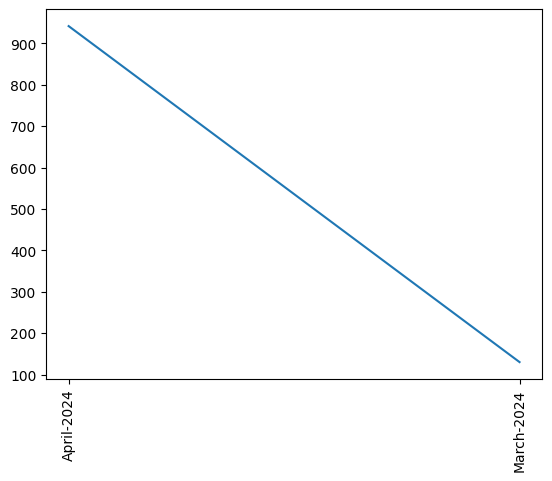

In [108]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [111]:
df['only_date']=df['Date'].dt.date

In [114]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

(array([19811., 19814., 19818., 19822., 19826., 19830., 19834.]),
 [Text(19811.0, 0, '2024-03-29'),
  Text(19814.0, 0, '2024-04-01'),
  Text(19818.0, 0, '2024-04-05'),
  Text(19822.0, 0, '2024-04-09'),
  Text(19826.0, 0, '2024-04-13'),
  Text(19830.0, 0, '2024-04-17'),
  Text(19834.0, 0, '2024-04-21')])

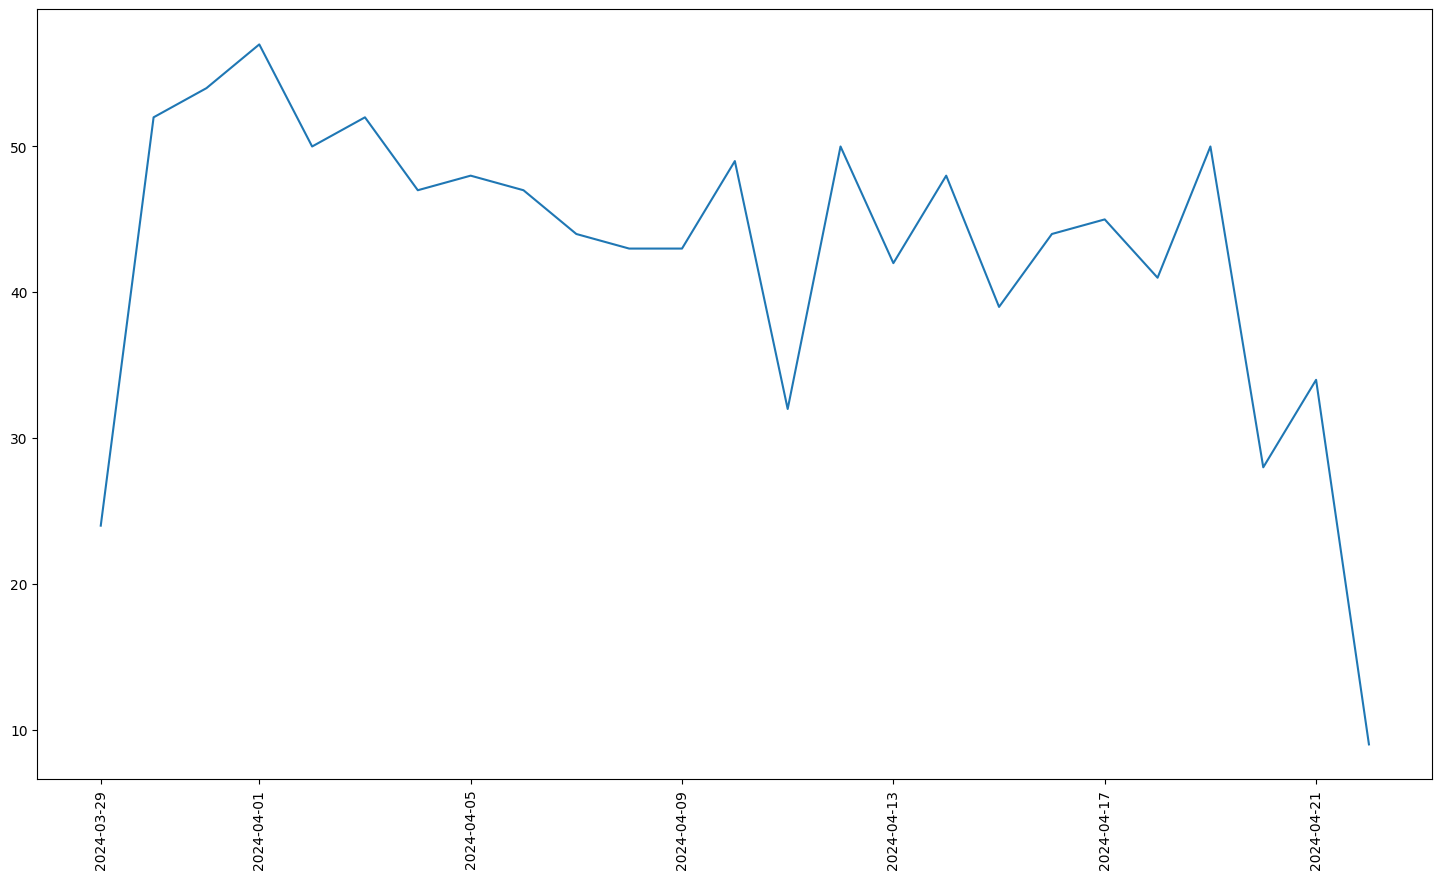

In [117]:
plt.figure(figsize=(18,10))

plt.plot(daily_timeline['only_date'],daily_timeline['message'])
plt.xticks(rotation='vertical')

In [118]:
df['day_name']=df['Date'].dt.day_name()

In [119]:
df['day_name'].value_counts()

day_name
Sunday       180
Friday       172
Saturday     169
Monday       148
Wednesday    146
Tuesday      137
Thursday     120
Name: count, dtype: int64

In [121]:
df['Month'].value_counts()

Month
April    942
March    130
Name: count, dtype: int64

In [123]:
df.columns

Index(['Date', 'user', 'message', 'Month', 'Day', 'Year', 'Hour', 'Minute',
       'AM/PM', 'only_date', 'day_name'],
      dtype='object')

In [135]:
df.head()

,Date,user,message,Month,Day,Year,Hour,Minute,AM/PM,only_date,day_name
0,2024-03-29 11:27:00,group_notification,Messages and calls are end-to-end encrypted. N...,March,29,2024,11,27,AM,2024-03-29,Friday
1,2024-03-29 10:27:00,group_notification,"Lamia Mujeeb Adn Talk created group ""B42 100 D...",March,29,2024,10,27,AM,2024-03-29,Friday
2,2024-03-29 11:27:00,group_notification,You joined using this group's invite link,March,29,2024,11,27,AM,2024-03-29,Friday
3,2024-03-29 11:28:00,group_notification,+91 6282 911 790 joined using this group's inv...,March,29,2024,11,28,AM,2024-03-29,Friday
4,2024-03-29 11:34:00,group_notification,Al Fidha Adn Talks Fathima joined using this g...,March,29,2024,11,34,AM,2024-03-29,Friday


In [136]:
period = []
for hour, am_pm in zip(df['Hour'], df['AM/PM']):
    if hour == 12:
        period.append(f'12 {am_pm} - 1 {am_pm}')
    elif hour == 11:
        period.append(f'11 {am_pm} - 12 {am_pm}')
    elif hour == 0:
        period.append(f'12 {am_pm} - 1 {am_pm}')
    else:
        period.append(f'{hour} {am_pm} - {hour+1} {am_pm}')


In [138]:
df['period']=period

In [139]:
df.head()

,Date,user,message,Month,Day,Year,Hour,Minute,AM/PM,only_date,day_name,period
0,2024-03-29 11:27:00,group_notification,Messages and calls are end-to-end encrypted. N...,March,29,2024,11,27,AM,2024-03-29,Friday,11 AM - 12 AM
1,2024-03-29 10:27:00,group_notification,"Lamia Mujeeb Adn Talk created group ""B42 100 D...",March,29,2024,10,27,AM,2024-03-29,Friday,10 AM - 11 AM
2,2024-03-29 11:27:00,group_notification,You joined using this group's invite link,March,29,2024,11,27,AM,2024-03-29,Friday,11 AM - 12 AM
3,2024-03-29 11:28:00,group_notification,+91 6282 911 790 joined using this group's inv...,March,29,2024,11,28,AM,2024-03-29,Friday,11 AM - 12 AM
4,2024-03-29 11:34:00,group_notification,Al Fidha Adn Talks Fathima joined using this g...,March,29,2024,11,34,AM,2024-03-29,Friday,11 AM - 12 AM


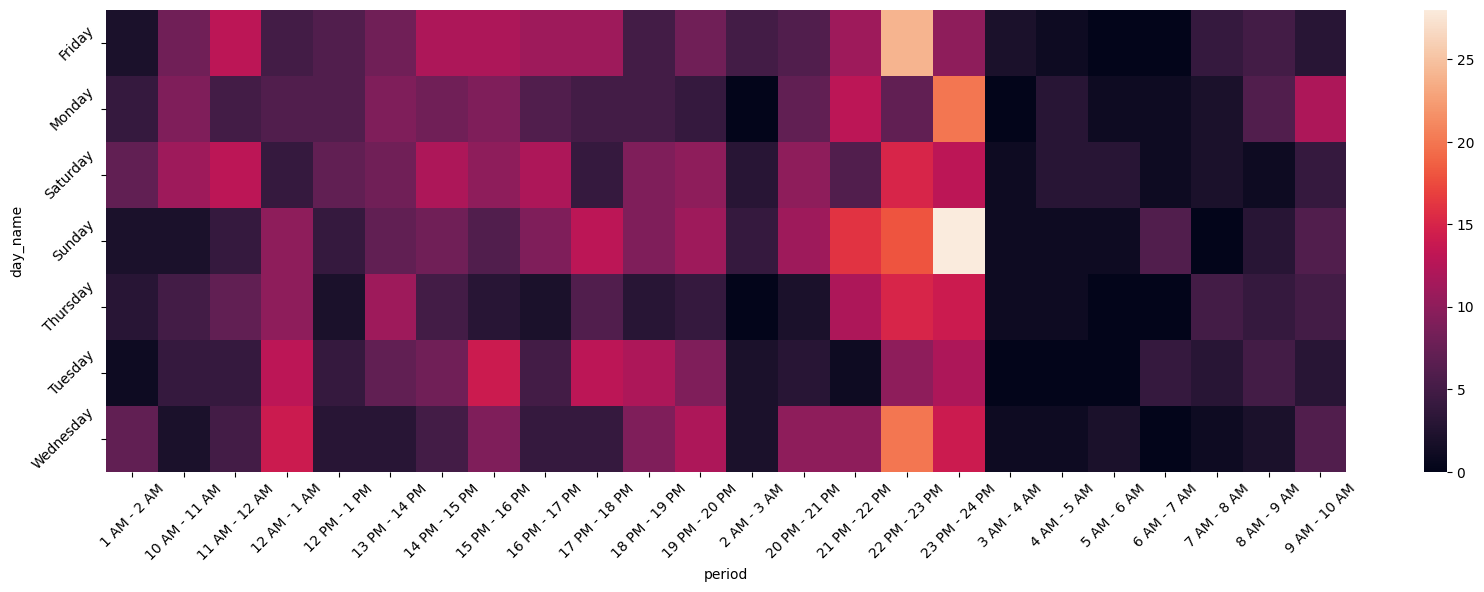

In [147]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

In [149]:
df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0)

period,1 AM - 2 AM,10 AM - 11 AM,11 AM - 12 AM,12 AM - 1 AM,12 PM - 1 PM,13 PM - 14 PM,14 PM - 15 PM,15 PM - 16 PM,16 PM - 17 PM,17 PM - 18 PM,...,21 PM - 22 PM,22 PM - 23 PM,23 PM - 24 PM,3 AM - 4 AM,4 AM - 5 AM,5 AM - 6 AM,6 AM - 7 AM,7 AM - 8 AM,8 AM - 9 AM,9 AM - 10 AM
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,2.0,8.0,13.0,5.0,6.0,8.0,12.0,12.0,11.0,11.0,...,11.0,24.0,10.0,2.0,1.0,0.0,0.0,4.0,5.0,3.0
Monday,4.0,9.0,5.0,6.0,6.0,9.0,8.0,9.0,6.0,5.0,...,13.0,7.0,20.0,0.0,3.0,1.0,1.0,2.0,6.0,12.0
Saturday,7.0,11.0,13.0,4.0,7.0,8.0,12.0,10.0,12.0,4.0,...,6.0,15.0,13.0,1.0,3.0,3.0,1.0,2.0,1.0,4.0
Sunday,2.0,2.0,4.0,10.0,4.0,7.0,8.0,6.0,9.0,13.0,...,16.0,18.0,28.0,1.0,1.0,1.0,6.0,0.0,3.0,6.0
Thursday,3.0,5.0,7.0,10.0,2.0,11.0,5.0,3.0,2.0,6.0,...,12.0,15.0,14.0,1.0,1.0,0.0,0.0,5.0,4.0,5.0
Tuesday,1.0,4.0,4.0,13.0,4.0,7.0,8.0,14.0,5.0,13.0,...,1.0,10.0,12.0,0.0,0.0,0.0,4.0,3.0,5.0,3.0
Wednesday,7.0,2.0,5.0,14.0,3.0,3.0,5.0,9.0,4.0,4.0,...,10.0,20.0,14.0,1.0,1.0,2.0,0.0,1.0,2.0,6.0
